# Comparing Silhouette, Davies-Bouldin, Calinski-Harabasz methods

### Method for importing the image by the given image name

In [1]:
import cv2

def load_image(name):
    image = cv2.imread('../images/' + format(name) + '.jpg')
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    return image

### Method for resizing the image by the given height

In [2]:
import cv2

def resize_image(image, wanted_height) :
    height = image.shape[0]
    scale_percent = height / wanted_height
    width = int(image.shape[0] / scale_percent)
    dim = (width, wanted_height)
    image = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
    
    return image

### Method for image segmentation k=2

In [3]:
import numpy as np
import cv2

def segmentation(image):
    pixel_values = image.reshape((-1, 1))

    pixel_values = np.float32(pixel_values)

    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    k = 2
    _, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

    labels = labels.flatten()
    
    return pixel_values, labels

### Method for calculating the Silhouette, Davies-Bouldin and Calinski-Harabasz scores and measuring run times

In [4]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score
import time

def cluster_calculation_times(values, labels):
    '''start = time.time()
    s_score = silhouette_score(values, labels)
    end = time.time()
    s_time = end-start
    '''
    s_time = 0
    
    start = time.time()
    db_score = davies_bouldin_score(values, labels)
    end = time.time()

    db_time = end-start
    
    start = time.time()
    ch_score = calinski_harabasz_score(values, labels)
    end = time.time()
    
    ch_time = end-start

    return s_time, db_time, ch_time

### Method for plotting the results

In [30]:
from matplotlib import pyplot as plt

def plot_result(size_values, s_times, db_times, ch_times, i):

    default_x_ticks = range(len(size_values))

    plt.title('Running times of the methods (image: ' + format(i) + '.jpg)')

    plt.plot(s_times, label='Silhouette method')
    plt.plot(db_times, label='Davies-Bouldin method')
    plt.plot(ch_times, label='Calinski-Harabasz method')

    plt.xticks(default_x_ticks, size_values)

    plt.xlabel("Image size")
    plt.ylabel("Time (s)")

    plt.legend()
    plt.show()

## Calculating and plotting run times for different images and different image sizes

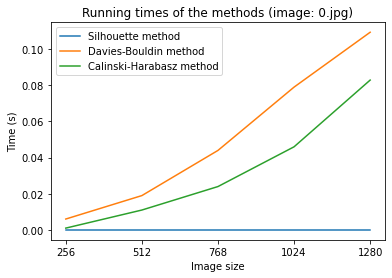

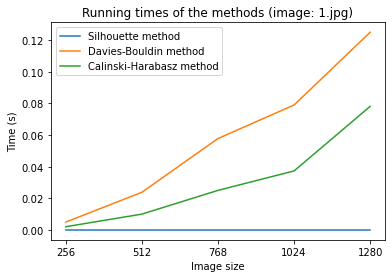

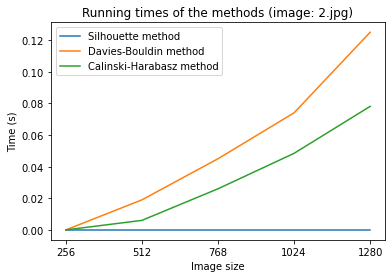

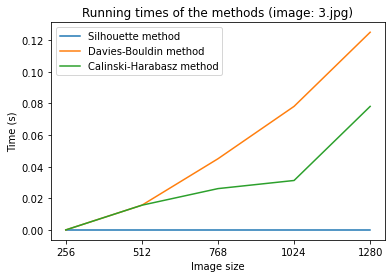

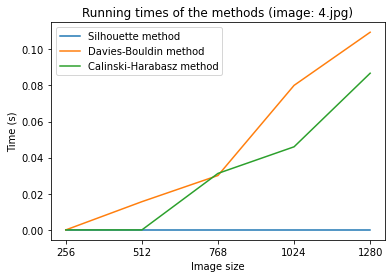

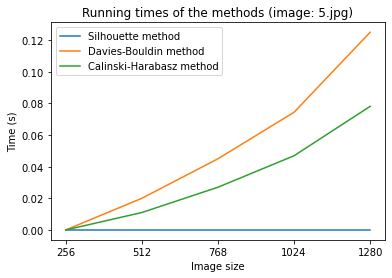

In [34]:
size_values = [256, 512, 768, 1024, 1280]

for j in range(6):
    s_times = []
    db_times = []
    ch_times = []

    image = load_image(format(j))

    for i in size_values:
        resized_image = resize_image(image, i)

        pixel_values, labels = segmentation(resized_image)

        s_time, db_time, ch_time = cluster_calculation_times(pixel_values, labels)
        s_times.append(s_time)
        db_times.append(db_time)
        ch_times.append(ch_time)

    plot_result(size_values, s_times, db_times, ch_times, j)